## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_interact.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 32 columns):
DAMAGE_PROPERTY       8270 non-null float64
DURATION_SECONDS      8270 non-null float64
BEGIN_LAT             8270 non-null float64
BEGIN_LON             8270 non-null float64
TOR_LENGTH            8270 non-null float64
TOR_WIDTH             8270 non-null float64
YEAR                  8270 non-null float64
OPEN_WATER_PROP       8270 non-null float64
DEV_OPEN_PROP         8270 non-null float64
DEV_LOW_PROP          8270 non-null float64
DEV_MED_PROP          8270 non-null float64
DEV_HIGH_PROP         8270 non-null float64
DECID_FOREST_PROP     8270 non-null float64
EVERGR_FOREST_PROP    8270 non-null float64
MIXED_FOREST_PROP     8270 non-null float64
SHRUB_SCRUB_PROP      8270 non-null float64
GRASS_LAND_PROP       8270 non-null float64
PASTURE_HAY_PROP      8270 non-null float64
CULT_CROPS_PROP       8270 non-null float64
WOOD_WETLAND_PROP     8270 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 1 columns):
DAMAGE_PROPERTY    8270 non-null float64
dtypes: float64(1)
memory usage: 64.7 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 2:]


# Get rid of non-location and non-landcover variables
tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH",
                                          "BEGIN_TIME"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 22 columns):
BEGIN_LAT             8270 non-null float64
BEGIN_LON             8270 non-null float64
OPEN_WATER_PROP       8270 non-null float64
DEV_OPEN_PROP         8270 non-null float64
DEV_LOW_PROP          8270 non-null float64
DEV_MED_PROP          8270 non-null float64
DEV_HIGH_PROP         8270 non-null float64
DECID_FOREST_PROP     8270 non-null float64
EVERGR_FOREST_PROP    8270 non-null float64
MIXED_FOREST_PROP     8270 non-null float64
SHRUB_SCRUB_PROP      8270 non-null float64
GRASS_LAND_PROP       8270 non-null float64
PASTURE_HAY_PROP      8270 non-null float64
CULT_CROPS_PROP       8270 non-null float64
WOOD_WETLAND_PROP     8270 non-null float64
HERB_WETLAND_PROP     8270 non-null float64
BARREN_LAND_PROP      8270 non-null float64
INCOME                8270 non-null float64
TOT_DEV_INT           8270 non-null float64
TOT_WOOD_AREA         8270 non-null float64
WOOD_DEV_INT 

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.9112
 0.0276
 0.4114
   ⋮    
-0.1414
 0.1555
 0.6426
[torch.DoubleTensor of size 8270x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 1.0366e+00 -1.3721e+00 -1.6167e+00  ...  -2.2668e+00 -1.5494e+00  7.8470e-01
 8.7119e-01  7.4927e-01  7.3532e-01  ...   3.2059e-01  1.4421e+00  6.6004e-01
-3.0667e-02 -1.3753e+00 -1.6167e+00  ...  -2.3934e+00 -1.5539e+00 -1.1116e+00
                ...                   ⋱                   ...                
 1.4788e+00  3.3318e-01 -8.8386e-01  ...   5.4781e-01  2.4616e-01  8.4193e-01
-8.8898e-01 -8.8288e-01 -6.1654e-01  ...   5.9647e-01 -4.6919e-01 -8.0717e-01
-5.7436e-01  6.9363e-01  5.5296e-01  ...   9.0095e-01  6.3639e-01 -2.2743e+00
[torch.DoubleTensor of size 8270x22]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 1.0366e+00 -1.3721e+00 -1.6167e+00  ...  -2.2668e+00 -1.5494e+00  7.8470e-01
 8.7119e-01  7.4927e-01  7.3532e-01  ...   3.2059e-01  1.4421e+00  6.6004e-01
-3.0667e-02 -1.3753e+00 -1.6167e+00  ...  -2.3934e+00 -1.5539e+00 -1.1116e+00
                ...                   ⋱                   ...                
 1.4788e+00  3.3318e-01 -8.8386e-01  ...   5.4781e-01  2.4616e-01  8.4193e-01
-8.8898e-01 -8.8288e-01 -6.1654e-01  ...   5.9647e-01 -4.6919e-01 -8.0717e-01
-5.7436e-01  6.9363e-01  5.5296e-01  ...   9.0095e-01  6.3639e-01 -2.2743e+00
[torch.FloatTensor of size 8270x22]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 9e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

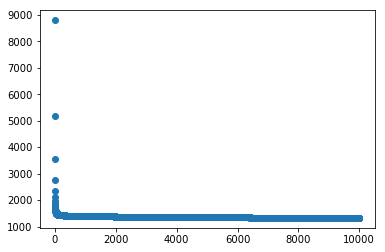

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8270)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

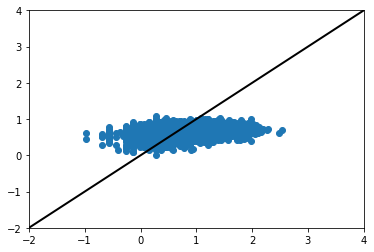

In [16]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_interact.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:,
                                 2:]

# Get rid of non-location and non-landcover variables
valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH",
                                          "BEGIN_TIME"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 22 columns):
BEGIN_LAT             2709 non-null float64
BEGIN_LON             2709 non-null float64
OPEN_WATER_PROP       2709 non-null float64
DEV_OPEN_PROP         2709 non-null float64
DEV_LOW_PROP          2709 non-null float64
DEV_MED_PROP          2709 non-null float64
DEV_HIGH_PROP         2709 non-null float64
DECID_FOREST_PROP     2709 non-null float64
EVERGR_FOREST_PROP    2709 non-null float64
MIXED_FOREST_PROP     2709 non-null float64
SHRUB_SCRUB_PROP      2709 non-null float64
GRASS_LAND_PROP       2709 non-null float64
PASTURE_HAY_PROP      2709 non-null float64
CULT_CROPS_PROP       2709 non-null float64
WOOD_WETLAND_PROP     2709 non-null float64
HERB_WETLAND_PROP     2709 non-null float64
BARREN_LAND_PROP      2709 non-null float64
INCOME                2709 non-null float64
TOT_DEV_INT           2709 non-null float64
TOT_WOOD_AREA         2709 non-null float64
WOOD_DEV_INT 

In [20]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight

In [21]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2417.9949
[torch.FloatTensor of size 1]

In [22]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 22 columns):
BEGIN_LAT             2709 non-null float64
BEGIN_LON             2709 non-null float64
OPEN_WATER_PROP       2709 non-null float64
DEV_OPEN_PROP         2709 non-null float64
DEV_LOW_PROP          2709 non-null float64
DEV_MED_PROP          2709 non-null float64
DEV_HIGH_PROP         2709 non-null float64
DECID_FOREST_PROP     2709 non-null float64
EVERGR_FOREST_PROP    2709 non-null float64
MIXED_FOREST_PROP     2709 non-null float64
SHRUB_SCRUB_PROP      2709 non-null float64
GRASS_LAND_PROP       2709 non-null float64
PASTURE_HAY_PROP      2709 non-null float64
CULT_CROPS_PROP       2709 non-null float64
WOOD_WETLAND_PROP     2709 non-null float64
HERB_WETLAND_PROP     2709 non-null float64
BARREN_LAND_PROP      2709 non-null float64
INCOME                2709 non-null float64
TOT_DEV_INT           2709 non-null float64
TOT_WOOD_AREA         2709 non-null float64
WOOD_DEV_INT 

In [23]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [24]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2709)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

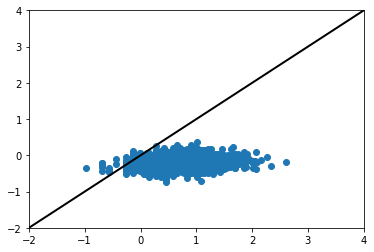

In [25]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

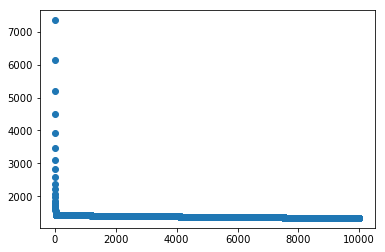

In [29]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

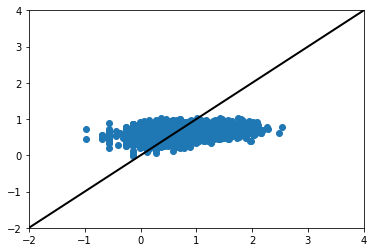

In [31]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [32]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight

In [33]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3853.7300
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

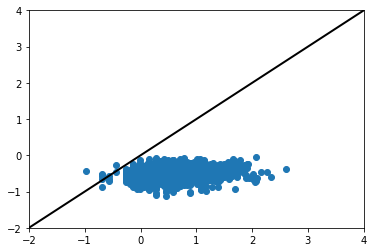

In [35]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 3: Three-Hidden-Layer Neural Network

In [36]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [37]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [38]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

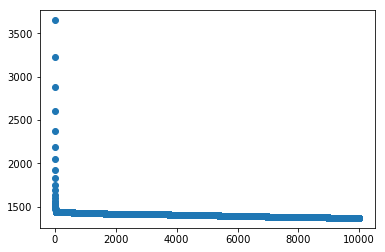

In [39]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [40]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

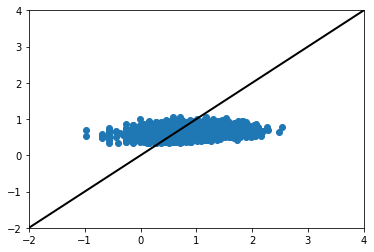

In [41]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [42]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight

In [43]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1902.9569
[torch.FloatTensor of size 1]

In [44]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

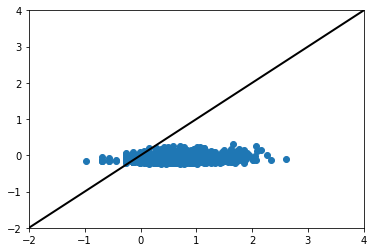

In [45]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 4: Four-Hidden Layer Neural Network

In [46]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [47]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [48]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

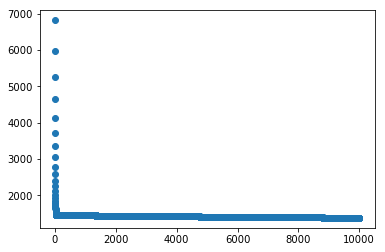

In [49]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [50]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

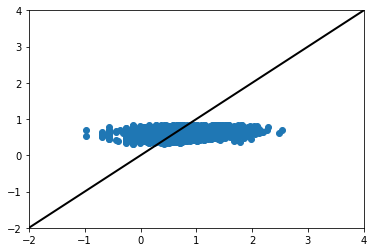

In [51]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [52]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight

In [53]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2231.2683
[torch.FloatTensor of size 1]

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

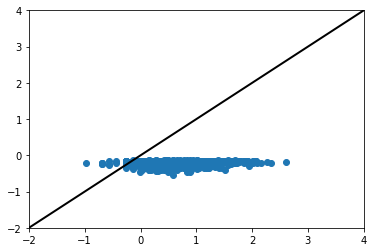

In [55]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 5: Five-Hidden-Layer Neural Network

In [56]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [57]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [58]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

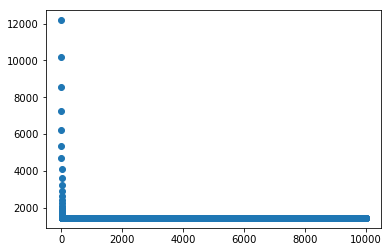

In [59]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [60]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

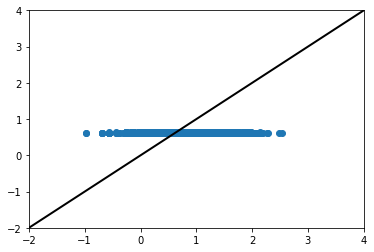

In [61]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [62]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight

In [63]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 501.9976
[torch.FloatTensor of size 1]

In [64]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

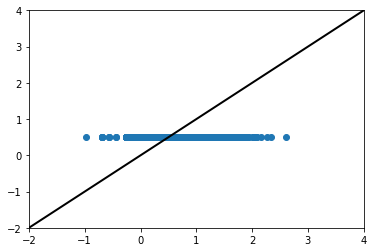

In [65]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 6: Six-Hidden-Layer Neural Network

In [66]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [67]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [68]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the mode
for t in range(10000):
    
    # Get current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

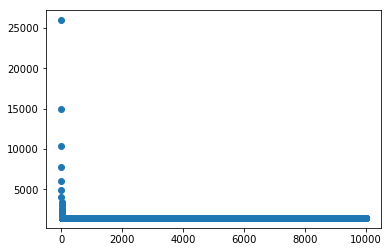

In [69]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [70]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

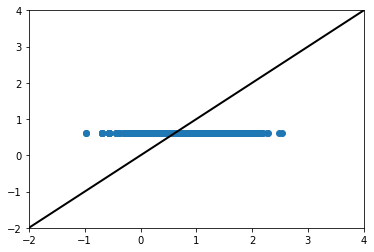

In [71]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [72]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 2),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(2, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight
dim_corrected_model[(12)].weight = model[(12)].weight

In [73]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 5424.9702
[torch.FloatTensor of size 1]

In [74]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

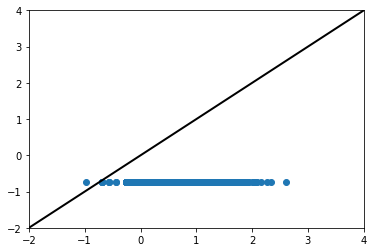

In [75]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

## Round 7: Linear Regression

In [76]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [77]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(22, 1))

In [78]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-6


# Train the neural network
for t in range(10000):
    
    # Get the current prediction
    y_pred = model(features_Variable)
    
    # Compute and append loss
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

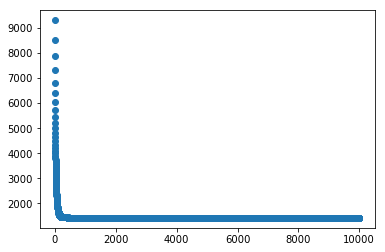

In [79]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [80]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

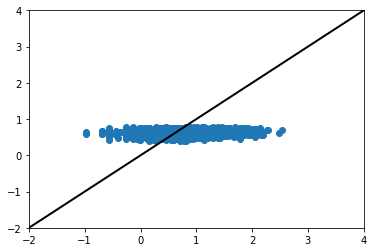

In [81]:
# Plot predictions versus training outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [82]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight

In [83]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1317.0972
[torch.FloatTensor of size 1]

In [84]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

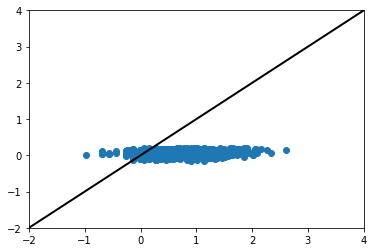

In [85]:
# Plot new predictions versus 'new' data
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)